# Part 1 - Data Processing

### Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

from jupyterthemes import jtplot
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=False)

### Importing Dataset

In [2]:
df = pd.read_csv('Diabetes Data.csv')
df.columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Checking shape of DataFrame

In [3]:
df.shape

(768, 9)

### Statistical summary

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Seeing the datatype of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data Visualization

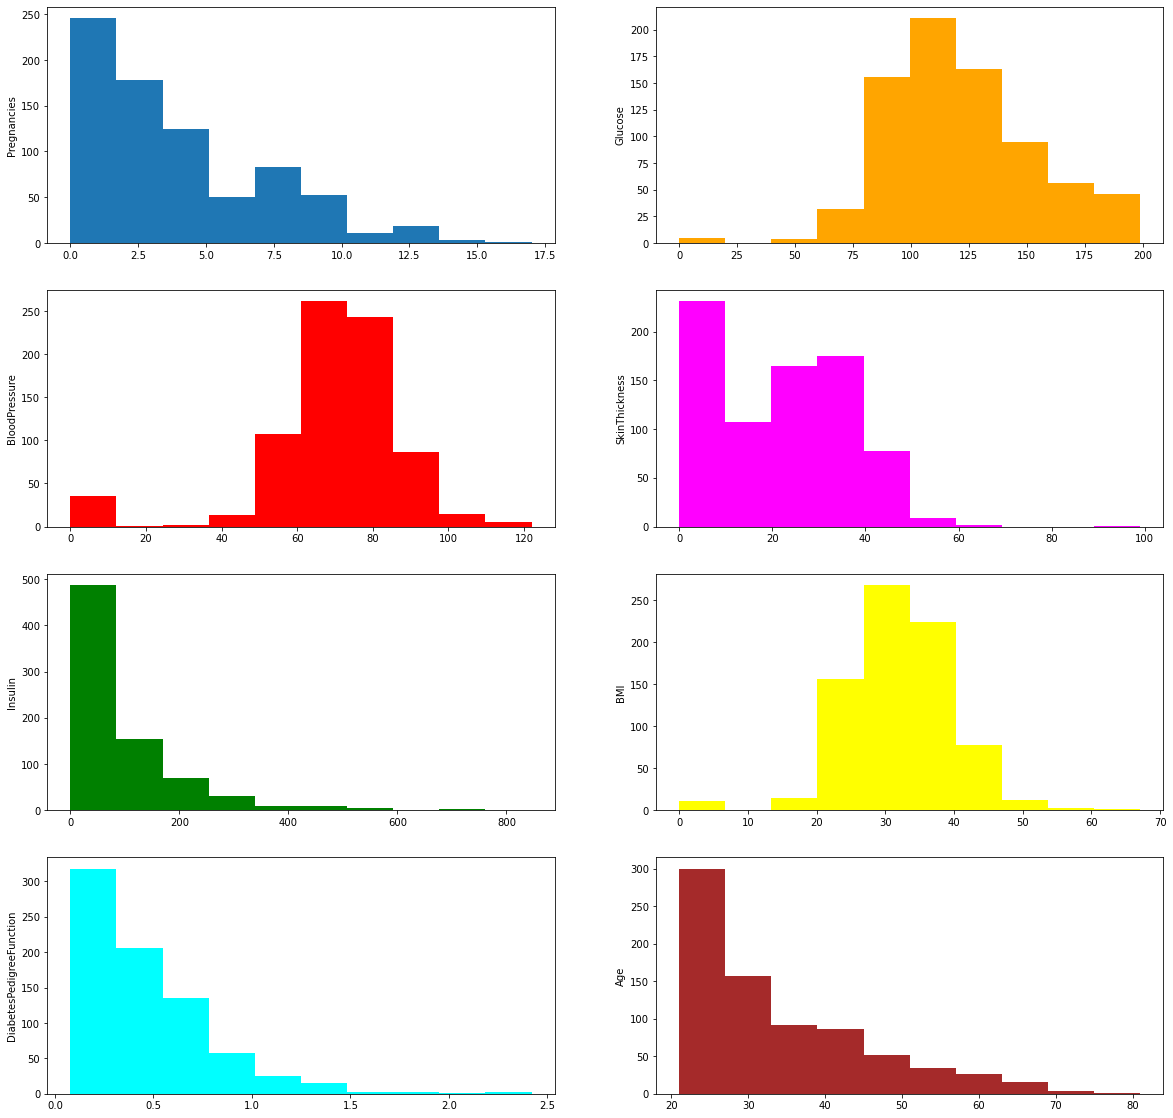

In [6]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(20,20))

ax[0,0].hist(df['Pregnancies'])
ax[0,0].set_ylabel("Pregnancies")

ax[0,1].hist(df['Glucose'], color='orange')
ax[0,1].set_ylabel("Glucose")

ax[1,0].hist(df['BloodPressure'], color='red')
ax[1,0].set_ylabel("BloodPressure")

ax[1,1].hist(df['SkinThickness'], color='magenta')
ax[1,1].set_ylabel("SkinThickness")

ax[2,0].hist(df['Insulin'], color='green')
ax[2,0].set_ylabel("Insulin")

ax[2,1].hist(df['BMI'], color='yellow')
ax[2,1].set_ylabel("BMI")

ax[3,0].hist(df['DiabetesPedigreeFunction'], color='cyan')
ax[3,0].set_ylabel("DiabetesPedigreeFunction")

ax[3,1].hist(df['Age'], color='brown')
ax[3,1].set_ylabel("Age")

plt.show()

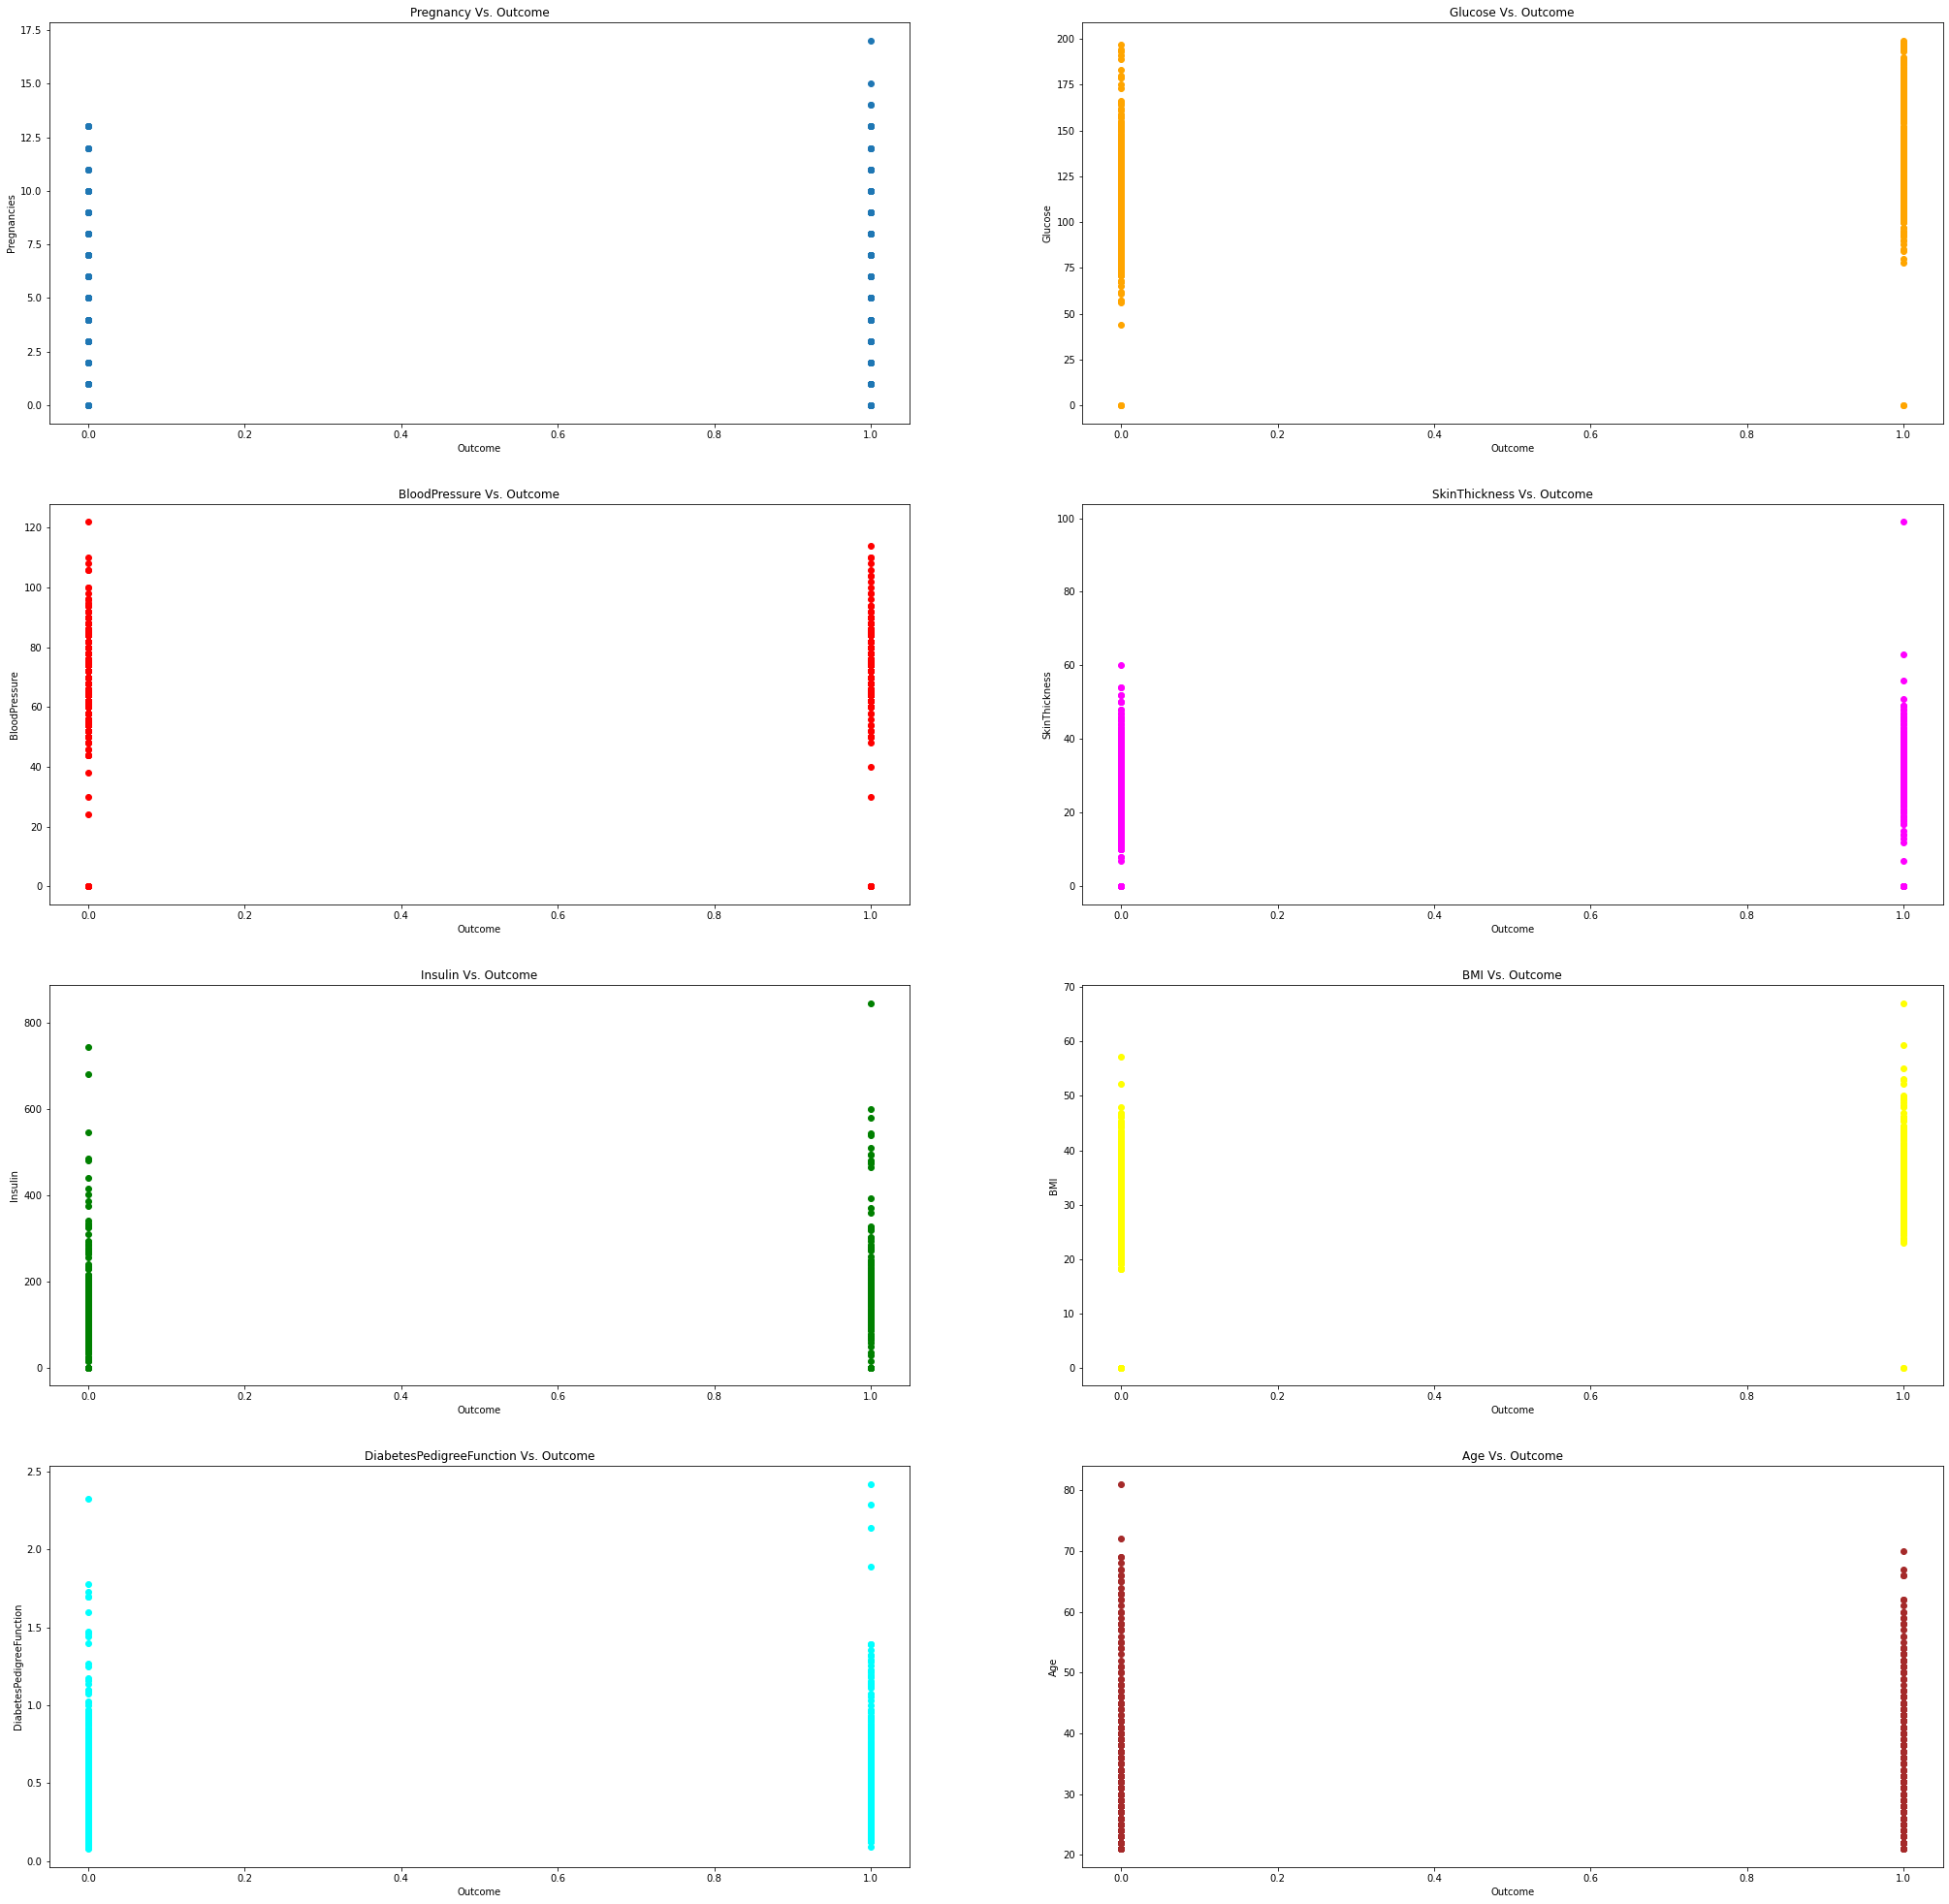

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(35,35))

ax[0,0].scatter(df['Outcome'], df['Pregnancies'])
ax[0,0].set_ylabel("Pregnancies")
ax[0,0].set_xlabel("Outcome")
ax[0,0].set_title("Pregnancy Vs. Outcome")

ax[0,1].scatter(df['Outcome'], df['Glucose'], color='orange')
ax[0,1].set_ylabel("Glucose")
ax[0,1].set_xlabel("Outcome")
ax[0,1].set_title("Glucose Vs. Outcome")

ax[1,0].scatter(df['Outcome'], df['BloodPressure'], color='red')
ax[1,0].set_ylabel("BloodPressure")
ax[1,0].set_xlabel("Outcome")
ax[1,0].set_title("BloodPressure Vs. Outcome")

ax[1,1].scatter(df['Outcome'], df['SkinThickness'], color='magenta')
ax[1,1].set_ylabel("SkinThickness")
ax[1,1].set_xlabel("Outcome")
ax[1,1].set_title("SkinThickness Vs. Outcome")

ax[2,0].scatter(df['Outcome'], df['Insulin'], color='green')
ax[2,0].set_ylabel("Insulin")
ax[2,0].set_xlabel("Outcome")
ax[2,0].set_title("Insulin Vs. Outcome")

ax[2,1].scatter(df['Outcome'], df['BMI'], color='yellow')
ax[2,1].set_ylabel("BMI")
ax[2,1].set_xlabel("Outcome")
ax[2,1].set_title("BMI Vs. Outcome")

ax[3,0].scatter(df['Outcome'], df['DiabetesPedigreeFunction'], color='cyan')
ax[3,0].set_ylabel("DiabetesPedigreeFunction")
ax[3,0].set_xlabel("Outcome")
ax[3,0].set_title("DiabetesPedigreeFunction Vs. Outcome")

ax[3,1].scatter(df['Outcome'], df['Age'], color='brown')
ax[3,1].set_ylabel("Age")
ax[3,1].set_xlabel("Outcome")
ax[3,1].set_title("Age Vs. Outcome")

plt.show()

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

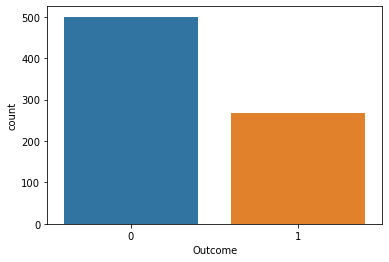

In [8]:
sns.countplot(df['Outcome'], label='Count')

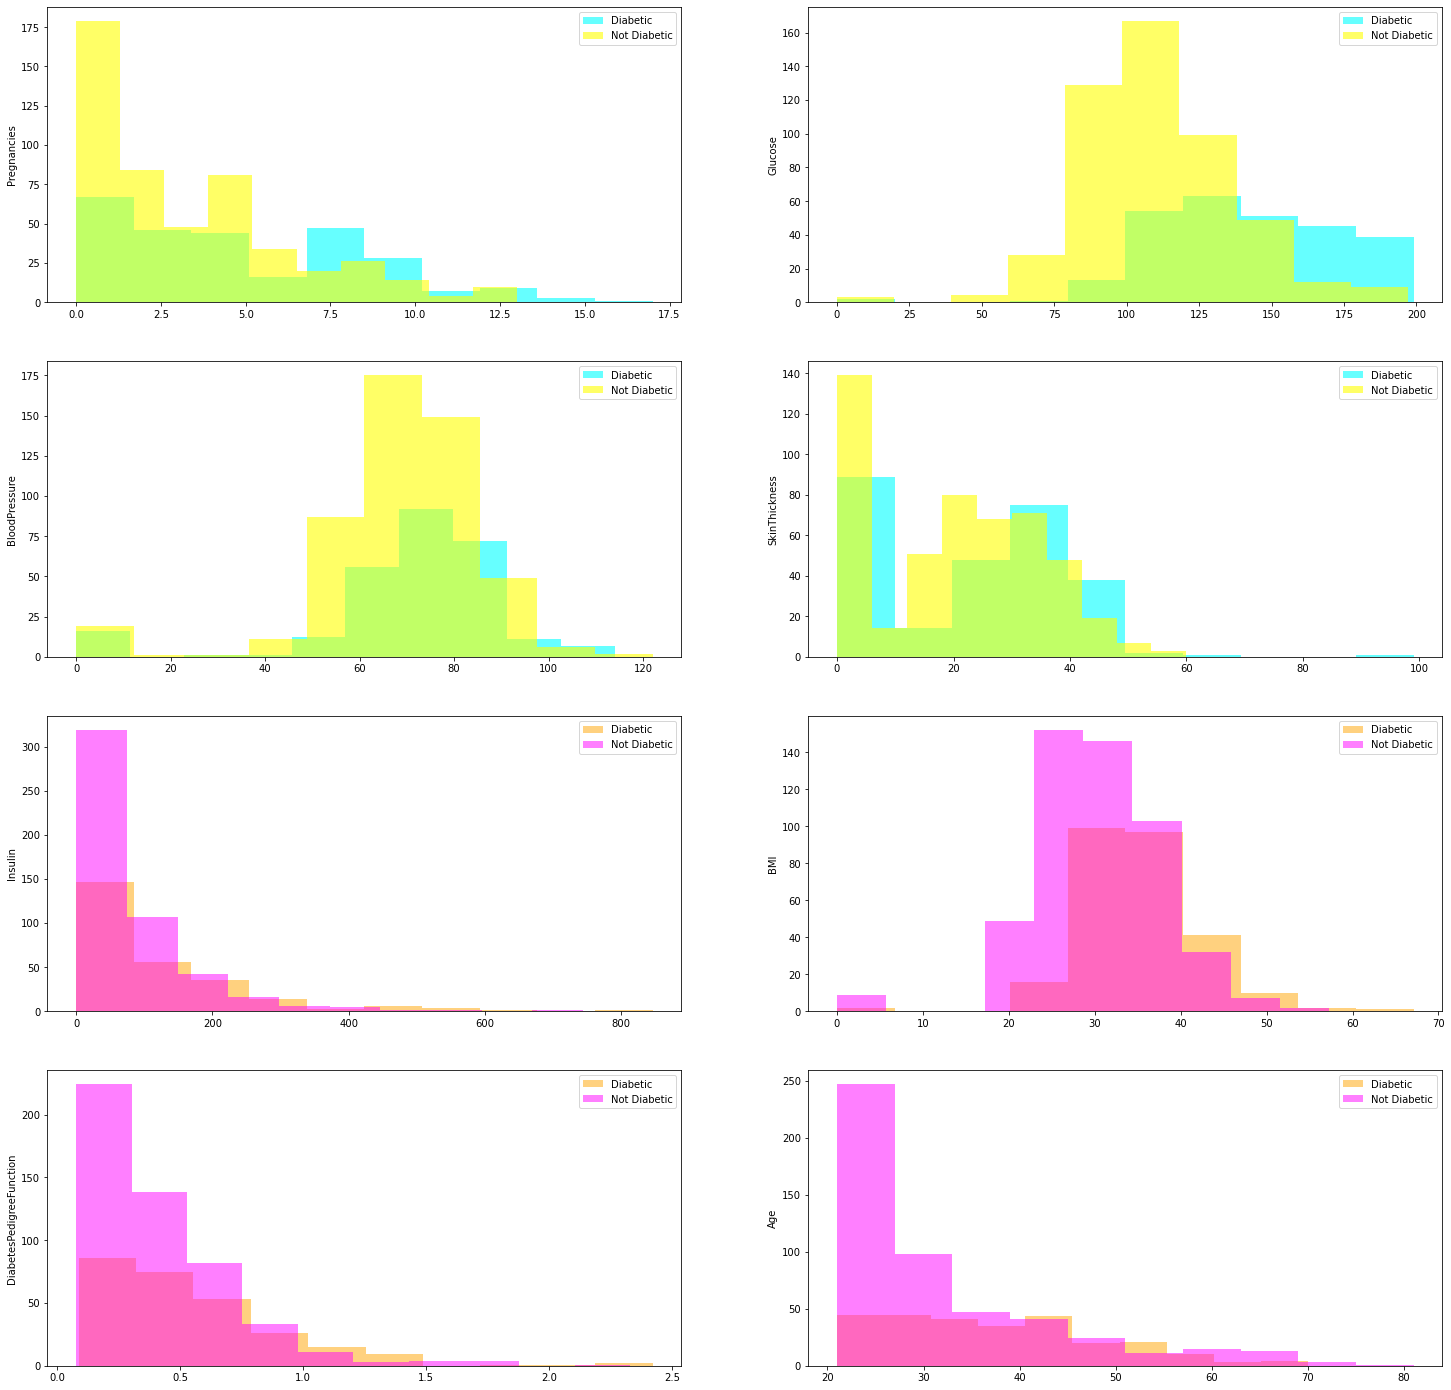

In [9]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize=(25,25))
ax[0,0].hist(df[df['Outcome']==1]['Pregnancies'], alpha=0.6, color='cyan', label="Diabetic")
ax[0,0].hist(df[df['Outcome']==0]['Pregnancies'], alpha=0.6, color='yellow', label="Not Diabetic")
ax[0,0].set_ylabel('Pregnancies')
ax[0,0].legend()

ax[0,1].hist(df[df['Outcome']==1]['Glucose'], alpha=0.6, color='cyan', label="Diabetic")
ax[0,1].hist(df[df['Outcome']==0]['Glucose'], alpha=0.6, color='yellow', label="Not Diabetic")
ax[0,1].set_ylabel('Glucose')
ax[0,1].legend()

ax[1,0].hist(df[df['Outcome']==1]['BloodPressure'], alpha=0.6, color='cyan', label="Diabetic")
ax[1,0].hist(df[df['Outcome']==0]['BloodPressure'], alpha=0.6, color='yellow', label="Not Diabetic")
ax[1,0].set_ylabel('BloodPressure')
ax[1,0].legend()

ax[1,1].hist(df[df['Outcome']==1]['SkinThickness'], alpha=0.6, color='cyan', label="Diabetic")
ax[1,1].hist(df[df['Outcome']==0]['SkinThickness'], alpha=0.6, color='yellow', label="Not Diabetic")
ax[1,1].set_ylabel('SkinThickness')
ax[1,1].legend()

ax[2,0].hist(df[df['Outcome']==1]['Insulin'], alpha=0.5, color='orange', label="Diabetic")
ax[2,0].hist(df[df['Outcome']==0]['Insulin'], alpha=0.5, color='magenta', label="Not Diabetic")
ax[2,0].set_ylabel("Insulin")
ax[2,0].legend()

ax[2,1].hist(df[df['Outcome']==1]['BMI'], alpha=0.5, color='orange', label="Diabetic")
ax[2,1].hist(df[df['Outcome']==0]['BMI'], alpha=0.5, color='magenta', label="Not Diabetic")
ax[2,1].set_ylabel("BMI")
ax[2,1].legend()

ax[3,0].hist(df[df['Outcome']==1]['DiabetesPedigreeFunction'], alpha=0.5, color='orange', label="Diabetic")
ax[3,0].hist(df[df['Outcome']==0]['DiabetesPedigreeFunction'], alpha=0.5, color='magenta', label="Not Diabetic")
ax[3,0].set_ylabel("DiabetesPedigreeFunction")
ax[3,0].legend()

ax[3,1].hist(df[df['Outcome']==1]['Age'], alpha=0.5, color='orange', label="Diabetic")
ax[3,1].hist(df[df['Outcome']==0]['Age'], alpha=0.5, color='magenta', label="Not Diabetic")
ax[3,1].set_ylabel("Age")
ax[3,1].legend()

plt.show()

### Heatmap

<AxesSubplot:>

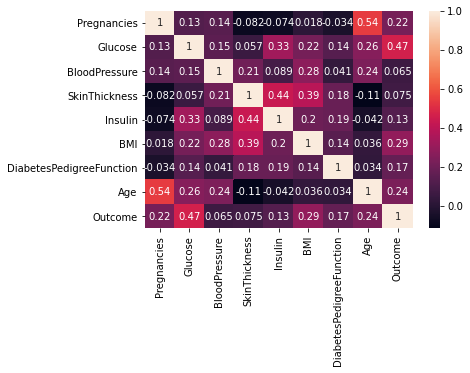

In [10]:
sns.heatmap(df.corr(), annot=True)

### Checking if there are any null values present in the DataFrame

In [11]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

### Splitting the DataFrame into Dependent and Independent Variables

In [12]:
x = df.iloc[:,[0,1,4,5,6,7]].values
y = df.iloc[:,-1].values

### Encoding

### Splitting the dataset into training and test set 

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=52)

### Applying feature scaling to training and test data

In [14]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2 - Model Building

In [15]:
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

LogisticRegression()

saving the model

In [16]:
# joblib.dump(classifier,'model.pkl')

### Prediction

In [17]:
y_pred = classifier.predict(x_test)

### Evaluation

Accuracy score

In [18]:
accuracy_score(y_test, y_pred)

0.8181818181818182

Confusion Matrix

In [19]:
confusion_matrix(y_test, y_pred)

array([[91,  9],
       [19, 35]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.7954545454545454

In [21]:
recall_score(y_test, y_pred)

0.6481481481481481